In [5]:
cd /spell

/spell


In [33]:
# python train_causal_autoencoder.py --alpha 0.01 --beta 0.1 --gamma 0.1 --rho 1 --batch 48 --lr 0.001
# succesfully trained this with (176, 216) images, embedding dimension 4, and
#         self.autoencoder = AutoEncoder(
#             channels=(16, 32, 64),
#             embedding_dimension=embedding_dim,
#             in_channels=1,
#             out_channels=1,
#             spatial_dims=2,
#             strides=(2, 2, 2),
#         ).to(DEVICE)


# maybe try:
# python train_causal_autoencoder.py --alpha 0.01 --beta 0.1 --gamma 0.1 --rho 1 --batch 48 --lr 0.001
# embedding dimension 8
# smaller feature map, harder to reconstruct
# net = AutoEncoder(
#     spatial_dims=2,
#     in_channels=1,
#     out_channels=1,
#     channels=(16, 16, 32, 16),
#     strides=(2, 2, 2, 2)
# )

In [22]:
import matplotlib.pyplot as plt
import torch
import pickle

from loaders.features import CausalEmbeddingsDataset, IMAGE_DIMENSIONS
from models.autoencoder import AutoEncoder
from constants import EMBEDDING_DIMENSION, DEVICE

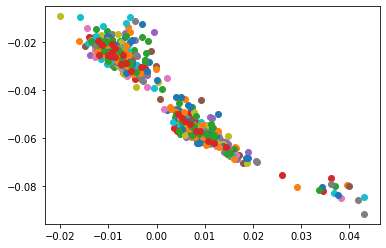

In [30]:
BEST_MODEL_PATH = '/spell/causal_ae_best.pth.tar'

dataset = CausalEmbeddingsDataset()
batch_size = 48
dataset = CausalEmbeddingsDataset()
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False
)


model = AutoEncoder(
            channels=(32, 64, 128),
            embedding_dimension=EMBEDDING_DIMENSION,
            in_channels=1,
            out_channels=1,
            spatial_dims=2,
            strides=(2, 2, 2),
        )

# parse through the dict, make modifications to string
pretrained_weights = torch.load(BEST_MODEL_PATH, map_location=lambda storage, loc: storage)["state_dict"]
for key in list(pretrained_weights.keys()):
    pretrained_weights[key.replace("autoencoder.", "")] = pretrained_weights.pop(key)
model.load_state_dict(pretrained_weights, strict=False)
model = model.to(DEVICE)


#### Causally consistent are embeddings that aren't confounded...
#### A confounded embedding would be capturing spurious relationship

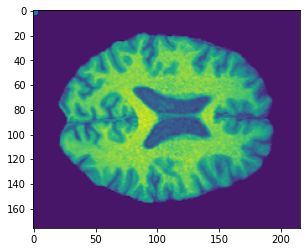

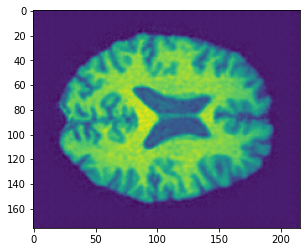

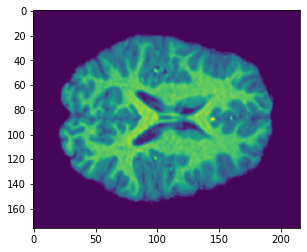

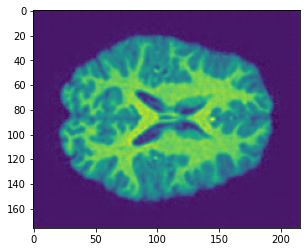

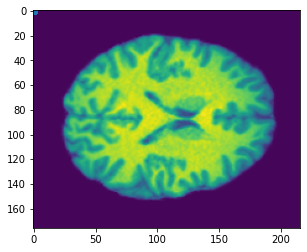

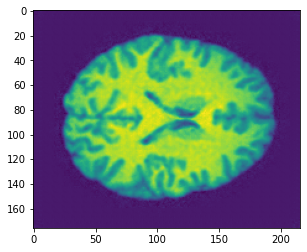

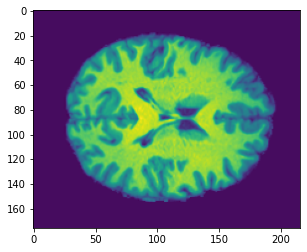

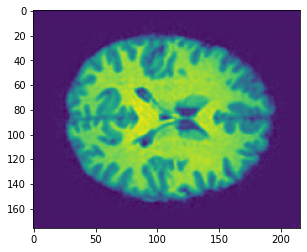

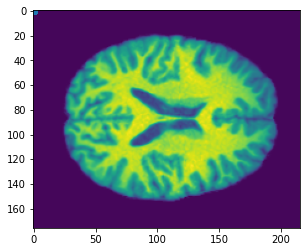

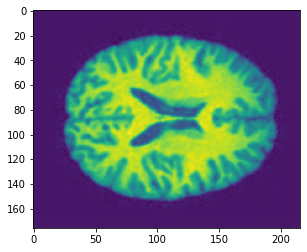

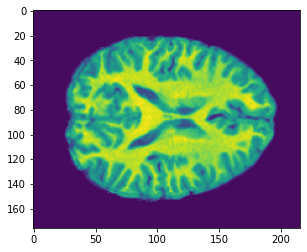

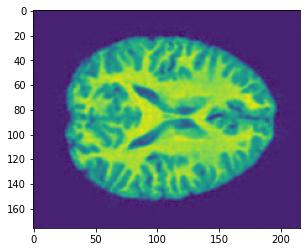

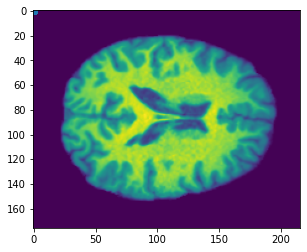

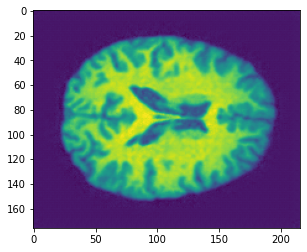

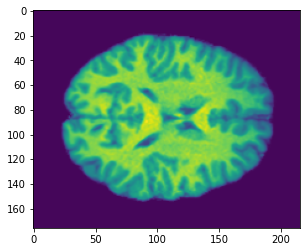

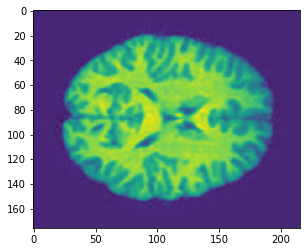

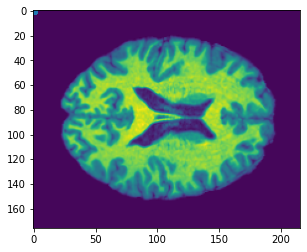

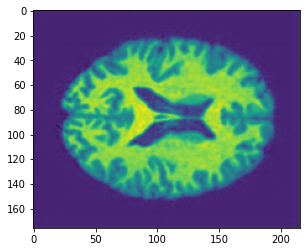

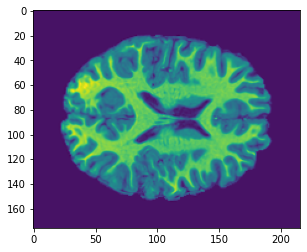

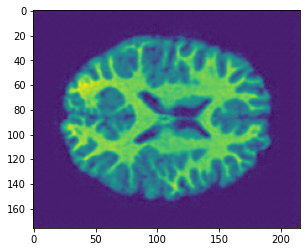

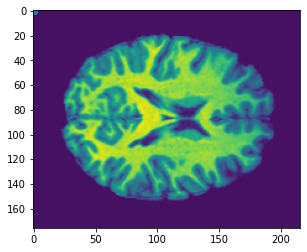

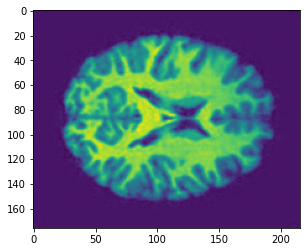

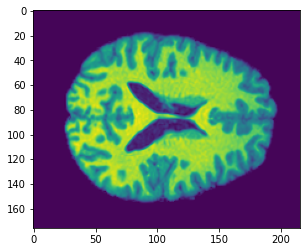

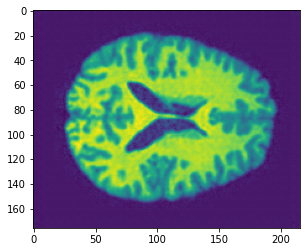

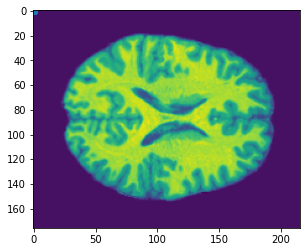

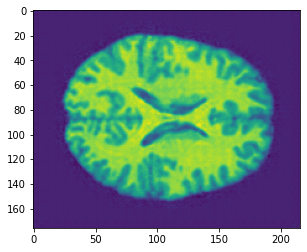

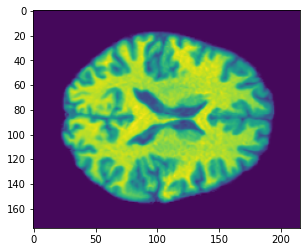

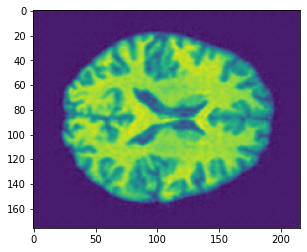

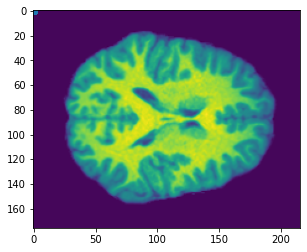

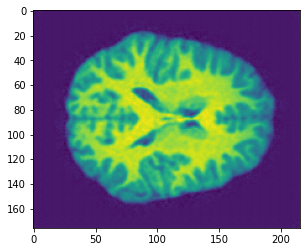

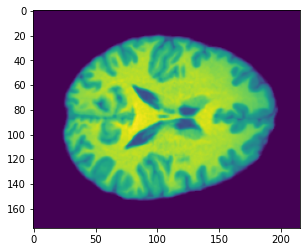

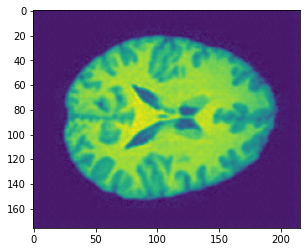

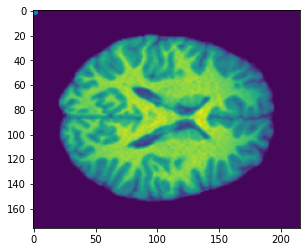

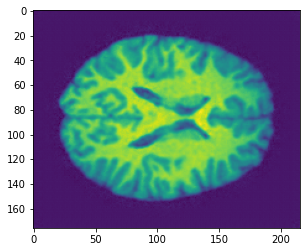

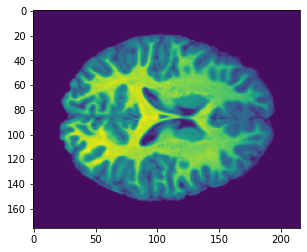

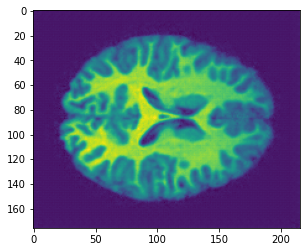

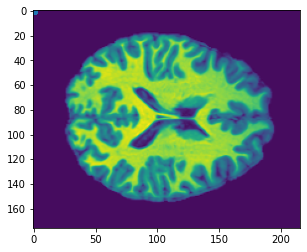

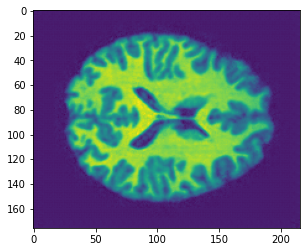

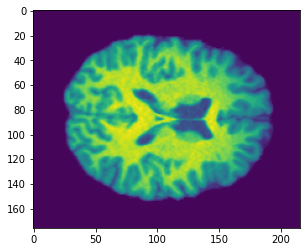

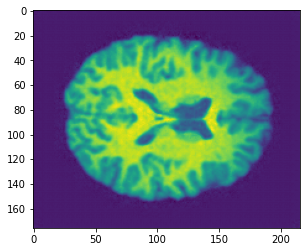

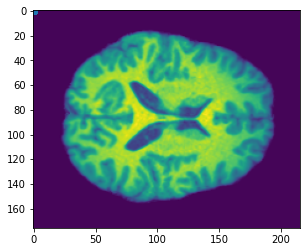

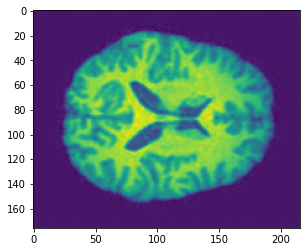

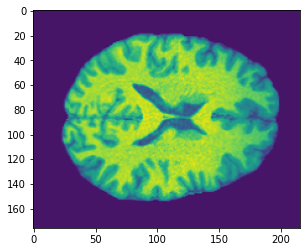

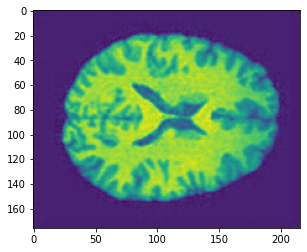

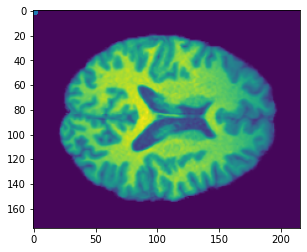

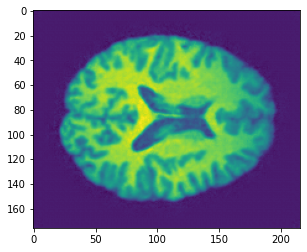

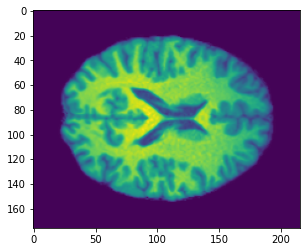

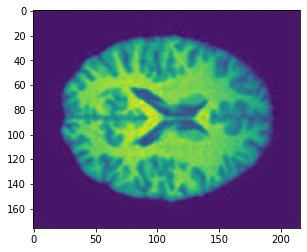

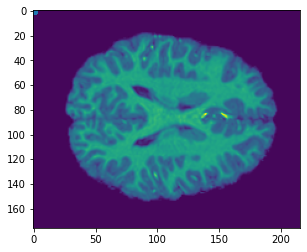

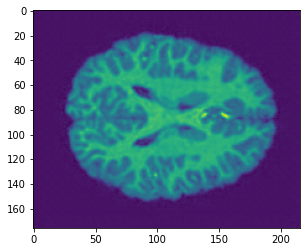

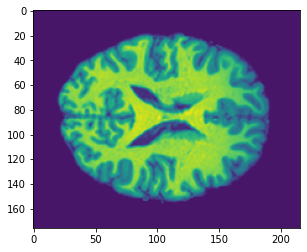

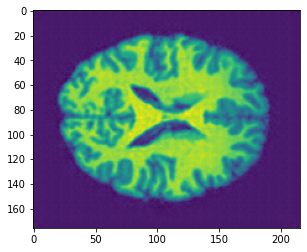

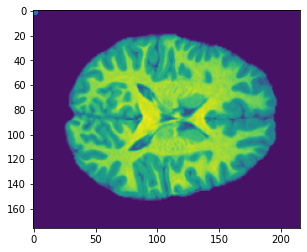

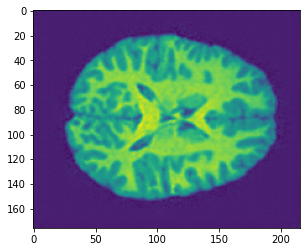

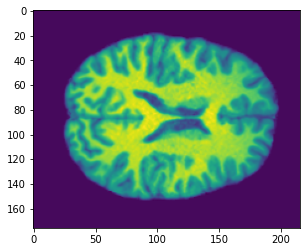

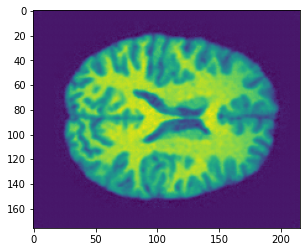

In [32]:
for images, obs_dict, ids in test_loader:
    recon_images, embeddings = model(images)
    embeddings = embeddings.detach().cpu().numpy()
    plt.scatter(embeddings[:,1], embeddings[:,2])
    
    for i in range(2):#range(len(ids)):
        id_ = ids[i].item()
        recon_image = recon_images[i]
        image = images[i]
        plt.imshow(image.detach().cpu().numpy().reshape(IMAGE_DIMENSIONS))
        plt.show()
        plt.imshow(recon_image.detach().cpu().numpy().reshape(IMAGE_DIMENSIONS))
        plt.show()
plt.show()

In [ ]:
#further compress the images, smaller feature maps

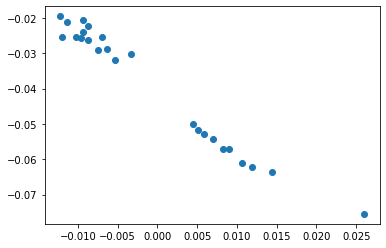

In [29]:
embeddings = embeddings.detach().cpu().numpy()
plt.scatter(embeddings[:,0], embeddings[:,1])